# APOORV GUPTA

The project data is related with the marketing campaigns of an banking institution. the marketing campaign are generally based on phone calls. Based on the personal information of a client and duration of call between bank executive and client, the main goal of the project is to predict whether client will subscribe the term deposit or not.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
Banking=pd.read_csv("C:\\Users\\Asus\\Downloads\\Banking-20230616T090314Z-001\\Banking\\Banking.csv")

In [3]:
Banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
Banking.describe() #Description of the dataset

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
Banking.isna().sum()   #To find null values...... as there are no null values therefore 0 in all the columns 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
Banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
Banking2=Banking.copy()   #The model will be run the copied file 

In [8]:
Banking2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
feature=['job', 'marital', 'education', 'default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
x=Banking2[feature].values
y=Banking['y'].values  # assigning the input features and the output column to train the model

In [10]:
x  # these are the input features

array([['management', 'married', 'tertiary', ..., -1, 0, 'unknown'],
       ['technician', 'single', 'secondary', ..., -1, 0, 'unknown'],
       ['entrepreneur', 'married', 'secondary', ..., -1, 0, 'unknown'],
       ...,
       ['retired', 'married', 'secondary', ..., 184, 3, 'success'],
       ['blue-collar', 'married', 'secondary', ..., -1, 0, 'unknown'],
       ['entrepreneur', 'married', 'secondary', ..., 188, 11, 'other']],
      dtype=object)

In [11]:
y   #Output column

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder  # to encode the categorical data

In [13]:
y=LabelEncoder().fit_transform(y)  #0 - No; 1 - Yes

In [14]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
# Get the list of categorical columns
categorical_columns = Banking2.select_dtypes(include=['object']).columns

# Create LabelEncoder for each categorical column
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply encoding column-wise
Banking2_encoded = Banking2.copy()
for col, le in label_encoders.items():
    Banking2_encoded[col] = le.fit_transform(Banking2[col])

print(Banking2_encoded)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration

job is encoded as: admin.: 0; blue-collar: 1; entrepreneur: 2; housemaid: 3; management: 4; retired: 5; self-employed: 6; services: 7; student: 8; technician: 9; unemployed: 10; unknown: 11

marital is encoded as: divorced: 0; married: 1; single: 2

education is encoded as: primary: 0; seconday: 1; tertiary: 2; unknown: 3

default is encoded as: No: 0; Yes: 1

housing is encoded as: No: 0; Yes: 1

loan is encoded as: No: 0; Yes: 1

contact is encoded as: cellular: 0; telephone: 1; unknown: 2

month is encoded as: jan: 4; feb: 3; mar: 7; apr: 0; may: 8; jun: 6; jul: 5; aug: 1; sep: 11; oct: 10; nov: 9; dec: 2

poutcome is encoded as: failure: 0; other: 1; success: 2; unknown: 3

all other columns were numeric data

In [16]:
x2 = Banking2_encoded

In [17]:
#split in training and testing data, in this data 70% data is used to train the model and 30% data is used to test the model
from sklearn.model_selection import train_test_split

x2_train, x2_test, y_train, y_test = train_test_split(x2,y, test_size=0.30) 

In [18]:
from sklearn.linear_model import LogisticRegression # for two output scenario i.e., yes and no logistic regression is the useful model to predict the data

In [19]:
model_log=LogisticRegression(max_iter=500)
model_log.fit(x2_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [20]:
y_pred_log=model_log.predict(x2_test)

In [21]:
Banking2.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report 

In [23]:
accuracy_log = accuracy_score(y_test, y_pred_log)*100
print('Accuracy of logistic model is equal '+str(round(accuracy_log,1))+'%')

Accuracy of logistic model is equal 99.9%


In [24]:
matrix= confusion_matrix(y_test,y_pred_log, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 1610    12]
 [    3 11939]]


In [25]:
matrix_log = classification_report(y_test,y_pred_log,labels=[1,0])
print('Classification report : \n',matrix_log)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1622
           0       1.00      1.00      1.00     11942

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



<AxesSubplot:>

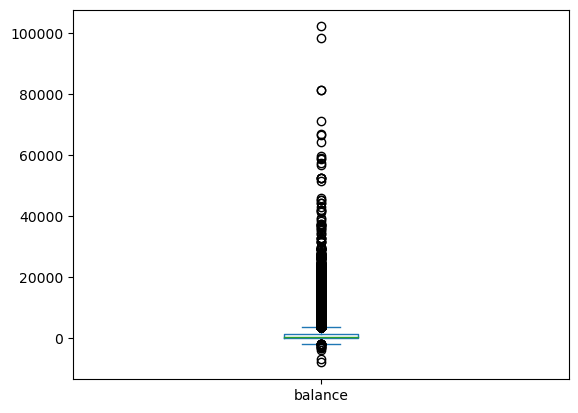

In [26]:
Banking2['balance'].plot(kind='box')

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


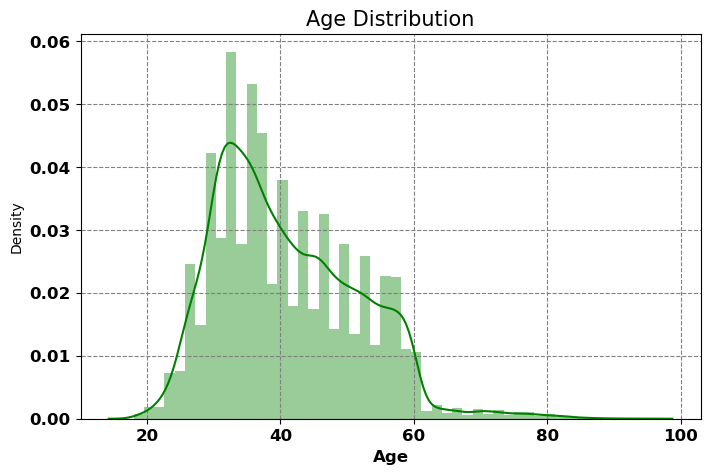

In [28]:
plt.figure(figsize=(8,5))
sns.distplot(Banking2['age'], kde=True, color='g')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(ls='--', color='grey')
plt.title('Age Distribution', fontsize=15)
plt.show()

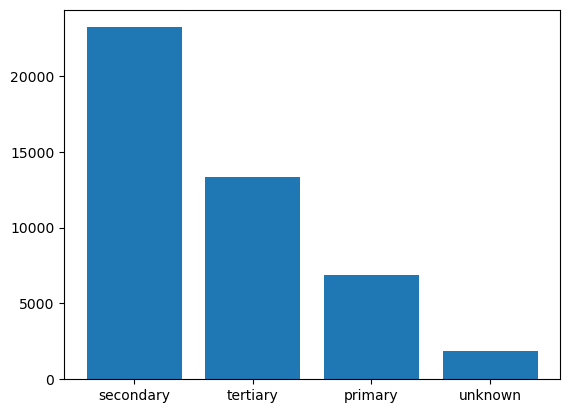

In [29]:
counts= Banking2['education'].value_counts()
plt.bar(x=counts.index, height=counts)
plt.show()

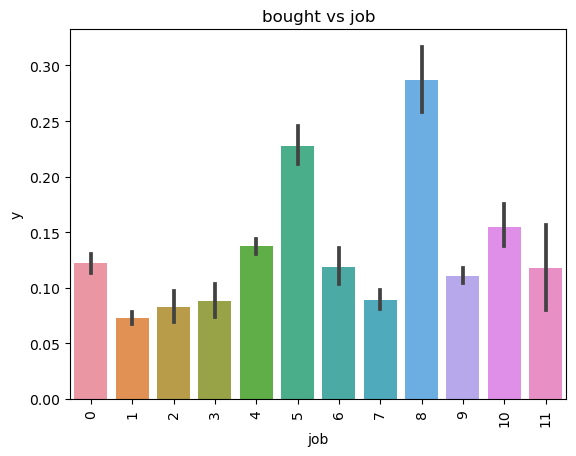

In [30]:
#plt.figure(figsize=[15,5])
sns.barplot(data=Banking2_encoded, x='job',y='y')

plt.xticks(rotation=90)
plt.title('bought vs job')
plt.show()